# Factored Workshops! 🚀
_Crearás un modelo capaz de predecir la duración total de un viaje de taxi en Nueva York 🗽_




## Carga y transformación de datos

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv("https://factored-workshops.s3.amazonaws.com/taxi-trip-duration.csv")
df_train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_borough,dropoff_borough
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Manhattan,Brooklyn
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Manhattan,Brooklyn


Variable |	Descripción de la variable
--- | ---
id‎‎ |	un identificador único para cada viaje‎
vendor_id‎‎  |	un código que indica el proveedor asociado con el registro de viaje‎
pickup_datetime‎‎  |	fecha y hora en que se inició el medidor‎
dropoff_datetime |	fecha y hora en que se desconectó el medidor‎
passenger_count‎‎  |	 el número de pasajeros en el vehículo (valor introducido por el conductor)‎
pickup_longitude‎‎  |	 la longitud donde se inició el medidor‎
pickup_latitude‎‎  |	la latitud donde se inició el medidor‎
dropoff_longitude‎‎  | la longitud donde se desconectó el medidor‎
dropoff_latitude‎‎  |	la latitud donde se desconectó el medidor‎
store_and_fwd_flag‎‎  |	 - Y = registro de viaje almacenado y reenviado; N=no es una tienda y un viaje hacia adelante‎
trip_duration‎‎  |	duración del viaje en segundos‎
pickup_borough	| Barrio de inicio
dropoff_borough | Barrio de fin
    

**‎store_and_fwd_flag‎‎**

Esta bandera indica si el registro de viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor porque el vehículo no tenía una conexión con el servidor - Y = almacenar y reenviar; N=no es una tienda y un viaje hacia adelante‎

In [4]:
df_train = df_train.drop("dropoff_datetime", axis=1) # Esto es lo que buscamos predecir  "duración del trayecto"

In [5]:
df_train.dtypes
# pickup_datetime debería tener un formato de fecha

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_borough         object
dropoff_borough        object
dtype: object

In [6]:
df_train['pickup_datetime']= pd.to_datetime(df_train['pickup_datetime'])

In [7]:
df_train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_borough                object
dropoff_borough               object
dtype: object

In [8]:
df_train["year"] = df_train["pickup_datetime"].dt.year
df_train["month"] = df_train["pickup_datetime"].dt.month
df_train["weekday"] = df_train["pickup_datetime"].dt.weekday
df_train["hour"] = df_train["pickup_datetime"].dt.hour

df_train[["pickup_datetime","year","month","weekday","hour"]].head()

,pickup_datetime,year,month,weekday,hour
0,2016-03-14 17:24:55,2016,3,0,17
1,2016-06-12 00:43:35,2016,6,6,0
2,2016-01-19 11:35:24,2016,1,1,11
3,2016-04-06 19:32:31,2016,4,2,19
4,2016-03-26 13:30:55,2016,3,5,13


In [9]:
df_train.shape
# 1458644 registros y 16 features

(1458644, 16)

In [10]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,weekday,hour
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,2016.0,3.516818e+00,3.050375e+00,1.360648e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,0.0,1.681038e+00,1.954039e+00,6.399693e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,2016.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,2016.0,2.000000e+00,1.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2016.0,4.000000e+00,3.000000e+00,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,2016.0,5.000000e+00,5.000000e+00,1.900000e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,2016.0,6.000000e+00,6.000000e+00,2.300000e+01


In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# Convertir a todos con # 5 decimales
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,weekday,hour
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227,2016.00000,3.51682,3.05037,13.60648
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172,0.00000,1.68104,1.95404,6.39969
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000,2016.00000,1.00000,0.00000,0.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000,2016.00000,2.00000,1.00000,9.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000,2016.00000,4.00000,3.00000,14.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000,2016.00000,5.00000,5.00000,19.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000,2016.00000,6.00000,6.00000,23.00000




*   La cantidad de pasajeros transportados va desde 0 hasta 9
*   La duración puede tomar mínimo 1 segundo y máximo 3'526.282 segundos que aproximadamente son 5.938 horas (¿Estos datos tienen sentido?) Es importante revisar si existen datos atípicos
* Los datos corresponden a los meses entre enero y junio del año 2016

In [12]:
df_train.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_borough,dropoff_borough,year,month,weekday,hour
0,id2875421,2,2016-03-14 17:24:55,1,-73.98215,40.76794,-73.96463,40.76560,N,455,Manhattan,Manhattan,2016,3,0,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.98042,40.73856,-73.99948,40.73115,N,663,Manhattan,Brooklyn,2016,6,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,Manhattan,Brooklyn,2016,1,1,11


In [13]:
df_train[['id','trip_duration']].sort_values('trip_duration',ascending=False).head(n=8)

,id,trip_duration
978383,id0053347,3526282
924150,id1325766,2227612
680594,id0369307,2049578
355003,id1864733,1939736
1234291,id1942836,86392
295382,id0593332,86391
73816,id0953667,86390
59891,id2837671,86387


Hay 5 registros que tienen un valor mayor a 1'900.000 segundos (<> 527.7 horas <> Aprox. 22 días)

Estos registros pueden ser calificados como outliers y por lo tanto pueden ser eliminados.

In [14]:
df_train[df_train['trip_duration'] > 100000] # <> 27 horas

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_borough,dropoff_borough,year,month,weekday,hour
355003,id1864733,1,2016-01-05 00:19:42,1,-73.78965,40.64356,-73.95681,40.77309,N,1939736,Staten_island,Manhattan,2016,1,1,0
680594,id0369307,1,2016-02-13 22:38:00,2,-73.92168,40.73525,-73.98475,40.75998,N,2049578,Brooklyn,Manhattan,2016,2,5,22
924150,id1325766,1,2016-01-05 06:14:15,1,-73.98379,40.74232,-73.98549,40.72768,N,2227612,Manhattan,Brooklyn,2016,1,1,6
978383,id0053347,1,2016-02-13 22:46:52,1,-73.78391,40.64863,-73.97827,40.75020,N,3526282,Queens,Manhattan,2016,2,5,22


In [15]:
df_train = df_train[df_train['trip_duration'] < 100000]

**CHECK POINT #1**
> Con cuántos registros y columnas queda el data set? 

In [16]:
df_train.shape
# 1 458 640 datos
# 16 columnas

(1458640, 16)

## Análisis de variables

In [17]:
#!pip install plotly #ejecutar este comando si no se tiene la librería de plotly instalada
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
import plotly
print(plotly.__version__)

4.4.1


### Matriz de correlaciones

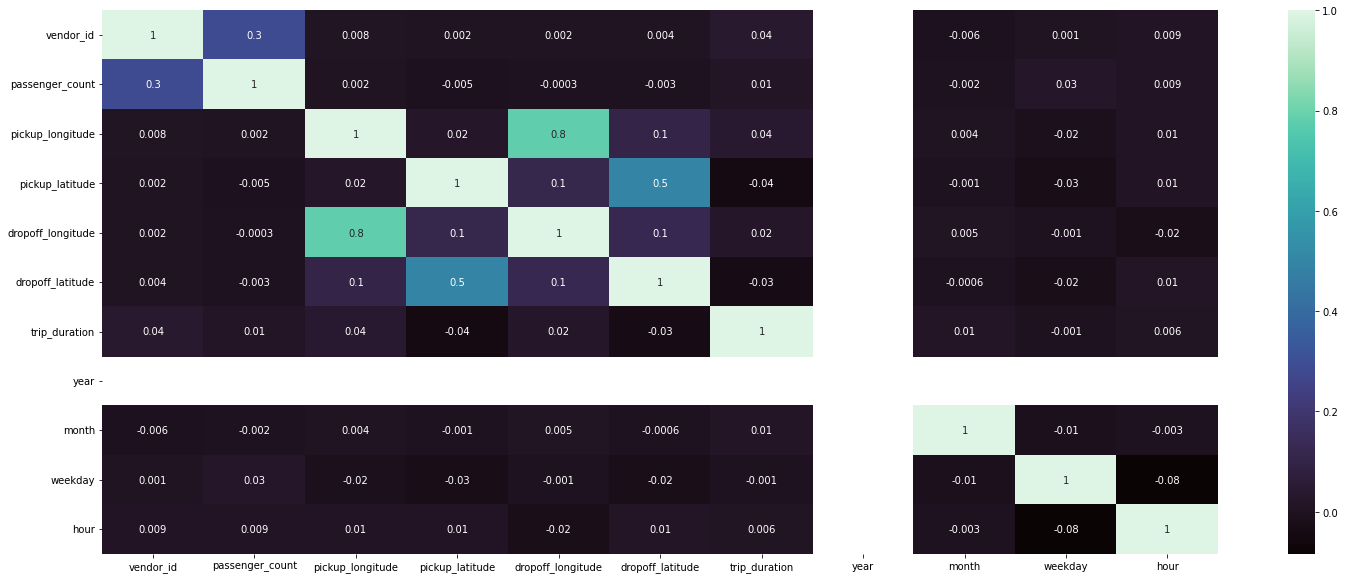

In [19]:
plt.subplots(figsize=(25,10))
sns.heatmap(df_train.corr(), annot = True, fmt='.1g', cmap="mako");
# annot = True => Mostrar los valores 
# fmt='.1g' => Formato a los valores
# cmap="coolwarm" => Color del mapa de calor 

**NOTA**

1. La **correlación** es en realidad cualquier relación estadística, ya sea causal o no, entre dos variables aleatorias en datos bivariados.

2. El **coeficiente de correlación** es una medida estadística de la fuerza de la relación entre los movimientos relativos de dos variables; sus valores oscilan entre -1.0 y 1.0. 
  * -1.0  correlación negativa perfecta
  * 1.0  correlación positiva perfecta
  * 0 no muestra ninguna relación lineal

---

[Pearson V/S Spearman Correlation Coefficient](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8)  

1. Coeficiente de correlación de Pearson

  Conocido como r de Pearson o correlación bivariada es una estadística que mide la correlación lineal entre dos variables X e Y.
  **Evalua SÓLO una relación lineal entre dos variables continuas**

2. Coeficiente de correlación de Spearman

  Conocido como ρ de Spearman, es una medida no paramétrica de la correlación de rango.  Puede evaluar una **relación monótona entre dos variables**: continua u ordinal y se basa en los valores clasificados para cada variable en lugar de los datos sin procesar.

  **¿Qué es una relación monótona?**
  - A medida que aumenta el valor de una variable, también lo hace el valor de la otra variable.
  - A medida que aumenta el valor de una variable, el valor de la otra variable disminuye.






In [20]:
# Pearson <> Evaluar una relación lineal
# Spearman <> Evaluar una relacion monotónica entre dos variables

### Variable respuesta: `trip_duration`

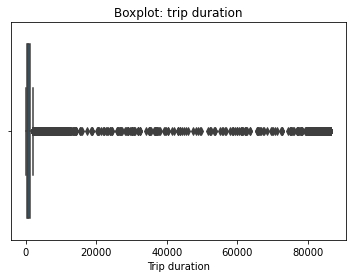

In [21]:
fig, ax = plt.subplots()
sns.boxplot(data = df_train
             , x = "trip_duration"
             , ax = ax)
ax.set_title("Boxplot: trip duration")
ax.set_xlabel("Trip duration")

plt.show()

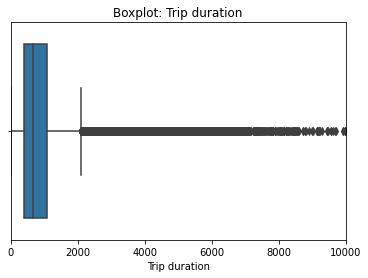

In [22]:
fig, ax = plt.subplots()
sns.boxplot(data = df_train
            , x = "trip_duration"
            , ax = ax)
ax.set_xlim(0,10000)
ax.set_title("Boxplot: Trip duration")
ax.set_xlabel("Trip duration")
plt.show()

Otra versión del boxplot para la variable `trip_duration` usando la librería `plotly`.

In [23]:
import matplotlib.style 
import matplotlib as mpl 
mpl.style.use('classic')

In [24]:
fig = px.box(df_train
             , y = "trip_duration"
             , labels = {"trip_duration": "Trip duration"}
             , title = "Boxplot: Trip duration")
fig.update_yaxes(range=[0, 10000])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

Luego de ver con diferentes librerías cómo es la distribución de la variable respuesta trip_duration podemos concluir que tiene muchos outliers, el promedio de duración de 662seg (es decir, 11 minutos) y el 75% de los viajes duran 1075seg o menos (18min).

### Vendor Id

Usando `seaborn` podemos realizar una gráfica de dispersión de datos cuando una de las variables es categórica, su nombre es `stripplot`.

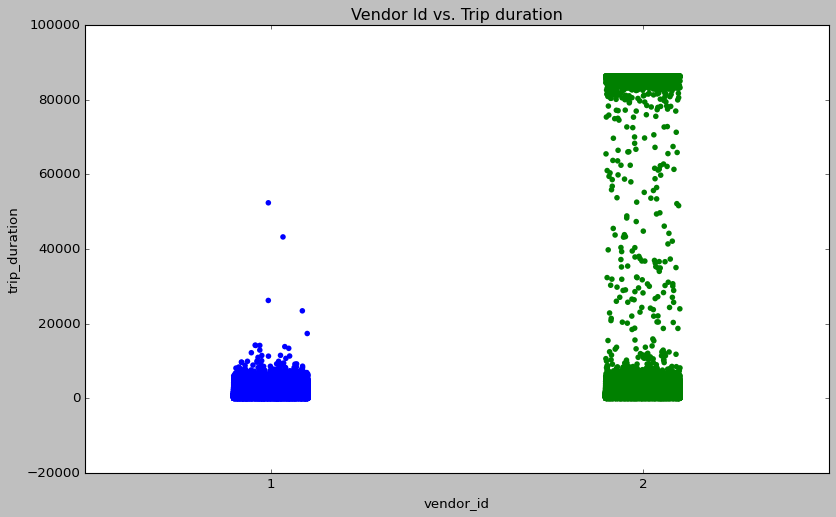

In [25]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.stripplot(data = df_train
              , x = "vendor_id"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Vendor Id vs. Trip duration");

Podemos ver que la mayoría de viajes del vendedor 1 están en su mayoría por debajo de 10.000 segundos (aprox. 2.7 horas), a diferencia del vendendor 2 donde hay muchos registros donde se supera este límite de tiempo.

### **Month**

**CHECK POINT #2**
> Cómo se vería un gráfico de dispersión de la duración del viaje en los diferentes meses del año?



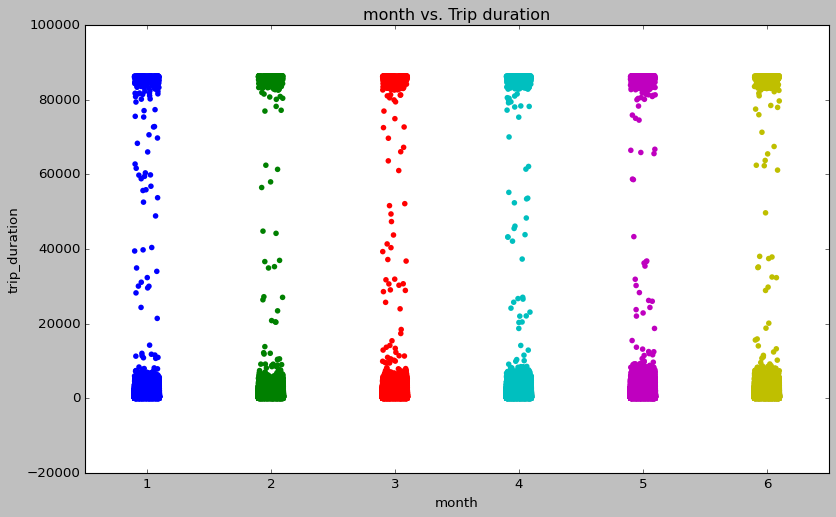

In [26]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.stripplot(data = df_train
              , x = "month"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("month vs. Trip duration");

In [27]:
df_train[['month', 'trip_duration']].groupby(by=['month']).agg({'trip_duration':['mean', 'count']})

trip_duration        
               mean   count
month                      
1         904.23918  229705
2         897.43950  238298
3         937.36536  256189
4         962.89146  251645
5         999.45055  248487
6        1013.36723  234316

En el resultado, podemos ver que alrededor de 230.000 - 240.0000 viajes se hacen por mes y la duración promedio está entre 900 y 1000 segundos (aprox. 15 - 16 min).

### Hour

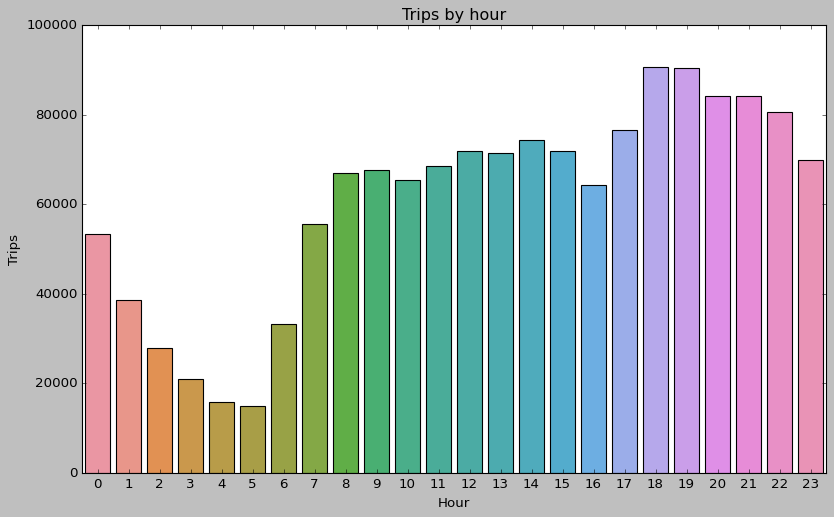

In [28]:
hour_trip = df_train[['hour', 'trip_duration']].groupby(by=['hour']).agg({'trip_duration': 'count'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = hour_trip
              , x = "hour"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Trips by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Trips");

Era de esperarse que los horarios con mayor cantidad de viajes sean al finalizar la jornada laboral (6-7pm). Sin embargo, también podemos revisar el promedio de duración de los viajes dependiendo de la hora en la que inició el servicio.

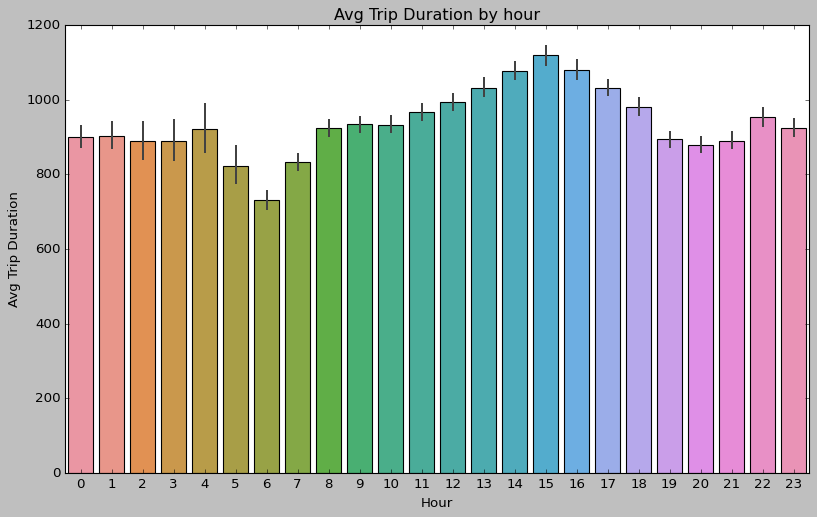

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = df_train
              , x = "hour"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Avg Trip Duration by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Avg Trip Duration");

Analizando la gráfica podemos ver que el tiempo promedio de viaje varía de acuerdo a la hora de inicio del viaje lo que quiere decir que la hora puede ser una variable interesante para predecir el tiempo de duración del viaje.

### Weekday

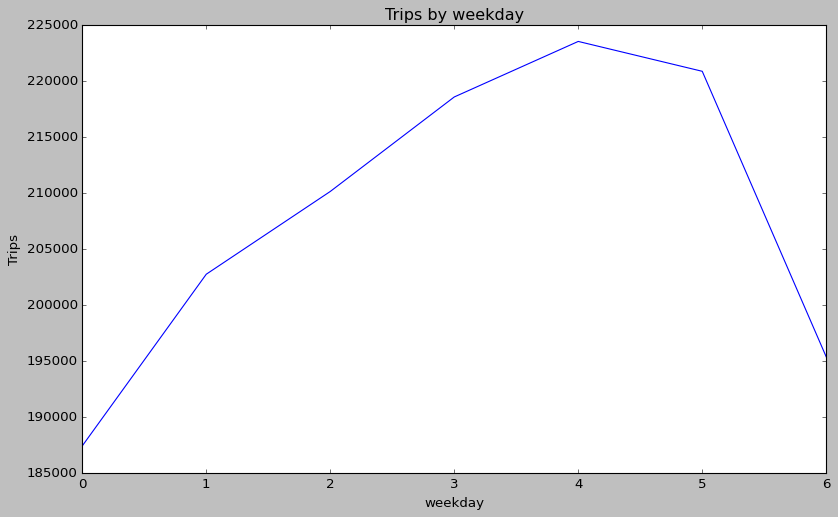

In [30]:
weekday_trip = df_train[['weekday', 'trip_duration']].groupby(
                        by=['weekday']).agg({'trip_duration': 'count'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data = weekday_trip
              , x = "weekday"
              , y = "trip_duration"
              , ax = ax
              , markers = True
                )
ax.set_title("Trips by weekday")
ax.set_xlabel("weekday")
ax.set_ylabel("Trips");

Podemos concluir que los días con mayor cantidad de viajes en taxi son los días cercanos al fin de semana, más específicamente entre jueves y sábado.

**CHECK POINT #3**
> Grafica un barplot teniendo en cuenta el día de la semana (weekday) y el promedio de la duración del viaje (trip_duration).¿Qué puedes concluir del resultado? ¿Crees que esta variable es relevante para el modelo predictivo?

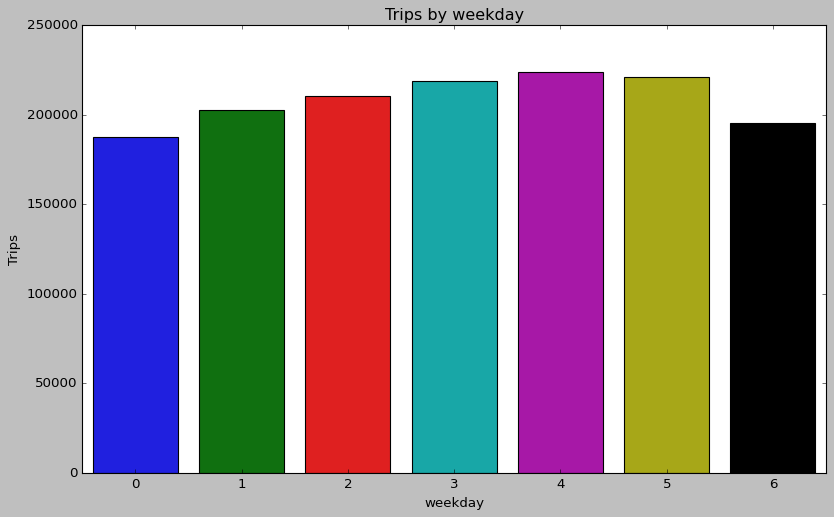

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = weekday_trip
              , x = "weekday"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Trips by weekday")
ax.set_xlabel("weekday")
ax.set_ylabel("Trips");

### **Passengers**

In [32]:
passengers_trip = df_train[['passenger_count',
                            'trip_duration']].groupby(
                                by=['passenger_count']).agg(
                                    {'trip_duration':['count','min','max',np.mean]})#.reset_index()
passengers_trip

trip_duration                       
                        count  min    max       mean
passenger_count                                     
0                          60    1  85901 1718.43333
1                     1033537    1  86391  922.95847
2                      210317    1  86392  995.71793
3                       59896    2  86365 1028.23628
4                       28404    2  86379 1053.52975
5                       78088    2  86378 1070.23217
6                       48333    2  86377 1061.35522
7                           3   15     25   19.66667
8                           1  104    104  104.00000
9                           1  560    560  560.00000

De la tabla anterior podemos concluir:
* Los viajes de 0 pasajeros tienen la duración media más alta de todos los grupos por cantidad de pasajeros.
* La mayoria de los viajes los realiza una persona.
* La duración media de los viajes son muy similares independientemente si va 1 o 6 personas.

### Pickup and dropoff borough

In [33]:
pivot_table = pd.pivot_table(df_train, 
                            values='trip_duration', 
                            index=['pickup_borough'], # Barrio de Inicio
                            columns=['dropoff_borough'], # Barrio de Fin
                            aggfunc=np.mean)
pivot_table

dropoff_borough,Bronx,Brooklyn,Manhattan,Queens,Staten_island
pickup_borough,,,,,
Bronx,793.20118,2257.80000,1491.17901,1349.42857,3628.40000
Brooklyn,2554.01218,762.58988,1104.32059,2103.19124,3033.34688
Manhattan,1676.25281,1173.13474,750.06705,1899.63377,2954.35378
Queens,1692.97097,2126.34177,2065.53434,908.81212,1604.67465
Staten_island,2531.93363,2650.97031,3043.28411,1526.62546,813.44935


Dado que en la tabla dinámica estamos comparando la misma métrica de promedio de duración del viaje entre diferentes destinos, podemos usar la gráfica de `heatmap` de `seaborn` para hacer la tabla más amigable con el usuario y de esta forma se pueden sacar conclusiones más rápidas.

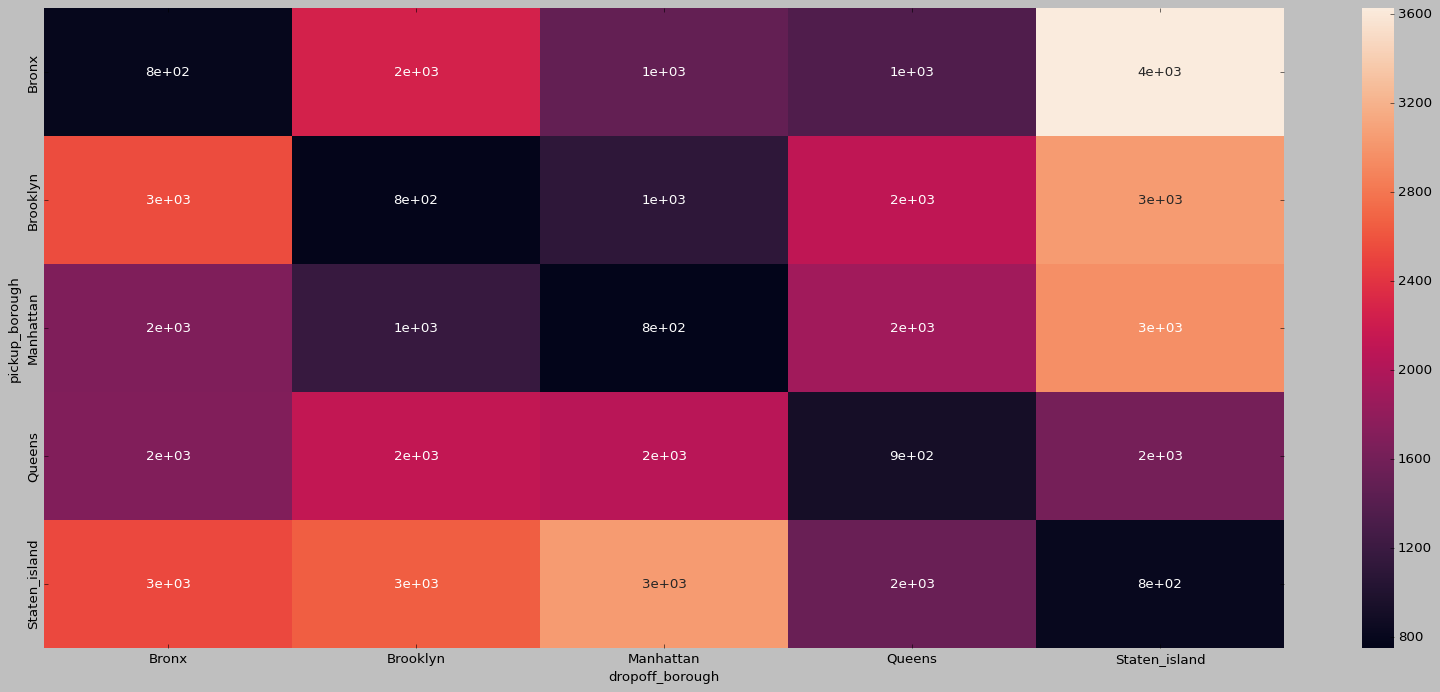

In [36]:
plt.subplots(figsize=(25, 10))
sns.heatmap(pivot_table,annot = True,fmt='.1g');

Podemos concluir que la combinación de locación inicial y locación final son determinantes para predecir la duración del viaje, por lo tanto, son variables que definitivamente deben estar incluidas en el modelo de predicción.

## Referencias


Aquí podrás encontrar los links de la documentación de las librerías que usamos durante el workshop.
* [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)
* [`seaborn`](https://seaborn.pydata.org/)
* [`matplotlib`](https://matplotlib.org/)

Adicionalmente, te recomendamos leer el libro Python Data Science Handbook de Jake VanderPlas, donde podrás encontrar muy buen contenido sobre manejo de datos a través de `numpy` y `pandas`, visualización con `matplotlib` y desarrollo de modelos de machine learning con `scikit-learn`.